# "Learning" to fit a line to data
Set the hyperparameters **iterations** and **lr** to fit the parameters **w** and **b**

In [61]:
import numpy as np

In [157]:
'''Create a linear dataset'''
n_samples = 100
X = np.arange(n_samples)

fudge = 25.0
delta = np.random.uniform(-fudge,fudge, size=(n_samples,))

m = 1.3
b = 17.7
Y = m * X + b + delta

print(f"X: {X.shape}")
print(f"y: {Y.shape}")

X: (100,)
y: (100,)


In [158]:
def predict(X, w, b):
    return X * w + b

In [1]:
def loss(X, Y, w, b):
    '''calculate the mean squared error'''
    return np.average((predict(X, w, b) - Y) ** 2)

In [160]:
def train(X, Y, iterations, lr):
    '''continue to calculate the loss and update w & b until the
        losses cannot be improved, or the max iterations is reached.
        If w, b are not returned, then convergence is not reached.
    '''
    w = b = 0
    for i in range(iterations):
        current_loss = loss(X, Y, w, b)
        if i%100 == 0:
            print(f"Iteration {i:4d} => Loss: {current_loss:.6f}")

        if loss(X, Y, w + lr, b) < current_loss:
            w += lr
        elif loss(X, Y, w - lr, b) < current_loss:
            w -= lr
        elif loss(X, Y, w, b + lr) < current_loss:
            b += lr
        elif loss(X, Y, w, b - lr) < current_loss:
            b -= lr
        else:
            return w, b

    # if w,b not returned within specified number of iterations, raise exception
    raise Exception(f"Couldn't converge within {iterations} iterations")

In [161]:
# Train the system
w, b = train(X, Y, iterations=10000, lr=0.01)
print(f"w:{w:.3f}, b:{b:.3f}")

Iteration    0 => Loss: 8225.577183
Iteration  100 => Loss: 1267.122745
Iteration  200 => Loss: 235.522896
Iteration  300 => Loss: 228.116425
Iteration  400 => Loss: 221.323952
Iteration  500 => Loss: 214.897581
Iteration  600 => Loss: 209.095309
Iteration  700 => Loss: 203.649038
Iteration  800 => Loss: 198.836965
Iteration  900 => Loss: 194.370795
Iteration 1000 => Loss: 190.548922
Iteration 1100 => Loss: 187.062851
Iteration 1200 => Loss: 184.231179
Iteration 1300 => Loss: 181.725208
Iteration 1400 => Loss: 179.883735
Iteration 1500 => Loss: 178.357865
Iteration 1600 => Loss: 177.488694
w:1.340, b:14.840


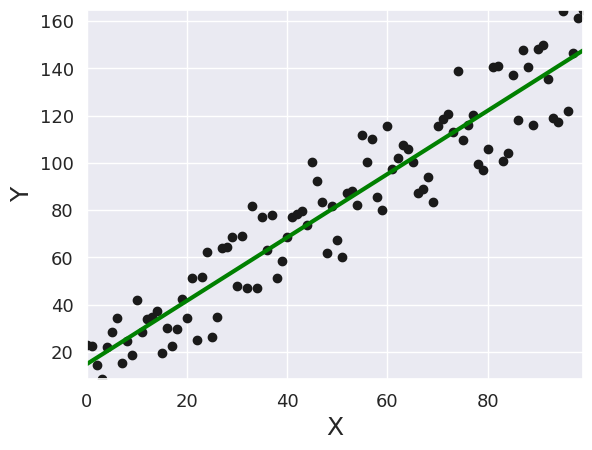

In [162]:
# Plot the chart
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.plot(X, Y, "ko")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("X", fontsize=18)
plt.ylabel("Y", fontsize=18)

x_min, x_max = np.min(X), np.max(X)
y_min, y_max = np.min(Y), np.max(Y)
plt.axis([x_min, x_max, y_min, y_max])
plt.plot([x_min, x_max], [b, predict(x_max, w, b)], linewidth=3.0, color="green")
plt.show()